<a href="https://colab.research.google.com/github/comodoro180/ICESI_MCD/blob/main/AnalisisExploratorioDatos/Unidad_3/Pronostico_Producion_MuestrasMedicas_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

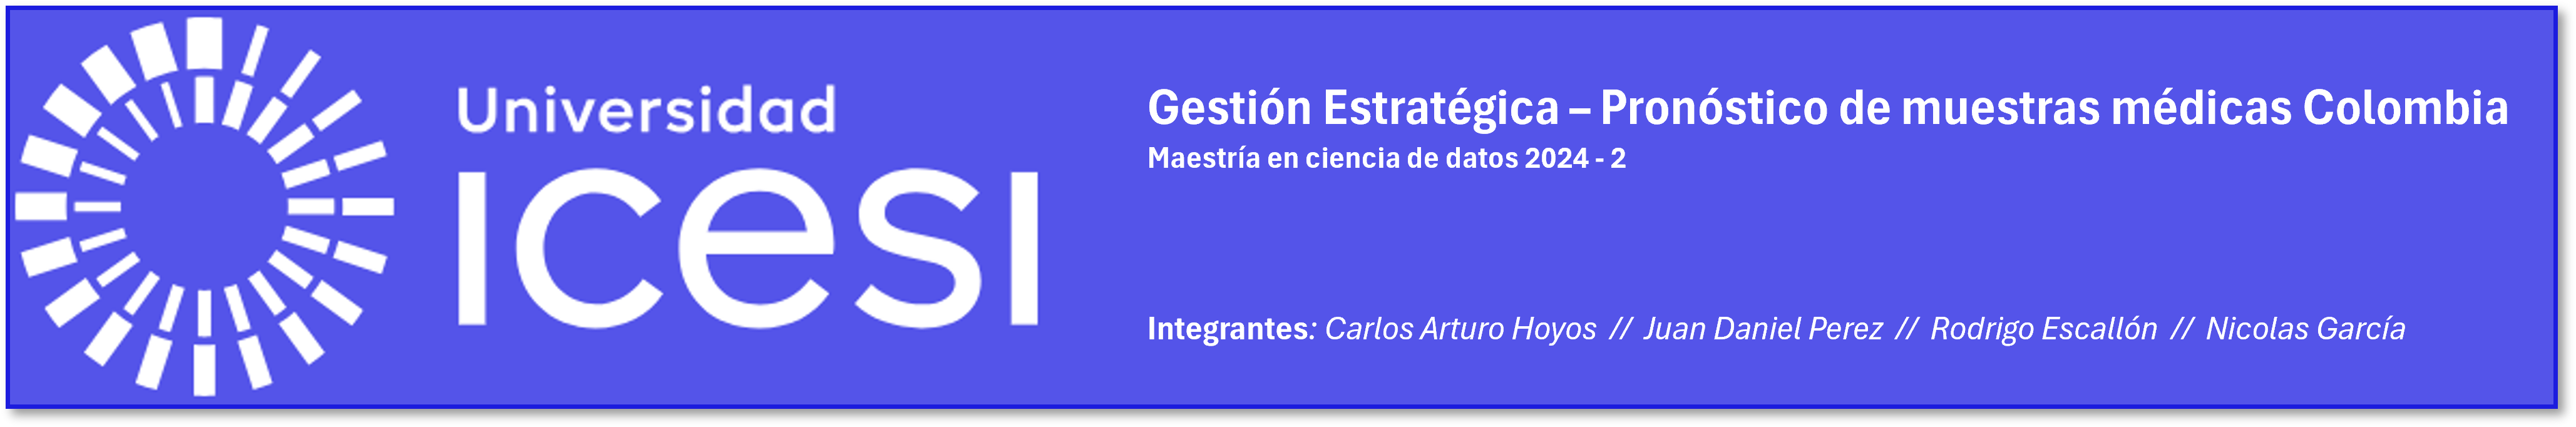

## **Contexto y definición del problema**

**Contexto:**  
La farmacéutica colombiana más grande del país basa una parte significativa de su estrategia de comunicación en la *_visita médica_*. Este proceso consiste en que representantes visitan a profesionales de la salud para ofrecerles un portafolio de productos acorde con su especialidad, además de proporcionar muestras médicas para que puedan ser utilizadas con sus pacientes y evaluar su eficacia.  

Sin embargo, actualmente se identifican deficiencias en la planificación de la producción de estas muestras médicas. La producción no logra satisfacer la demanda, lo que obliga a la empresa a utilizar productos destinados para venta comercial como sustituto de las muestras médicas. Este desbalance genera inconvenientes operativos y afecta la disponibilidad de productos para su comercialización.

**Se cuenta con:** La empresa proporciona un conjunto de datos que contiene información real sobre:  
1. Las muestras médicas fabricadas específicamente para este propósito.  
2. Los productos de venta comercial que se han utilizado como sustituto de las muestras médicas.  

La diferenciación de estos dos grupos puede realizarse mediante un *flag* y los códigos únicos de los artículos de muestra médica y venta comercial, que son distintos.  

**Problema general:** Producción insuficiente de muestras médicas para cubrir la demanda del laboratorio en Colombia.

A partir del análisis de los datos históricos despachados, incluyendo muestras médicas y no médicas, de los últimos cinco años (2019-2023), es posible aplicar técnicas de modelado predictivo para estimar la demanda mensual de unidades a producir en 2024. Esto permitirá garantizar un inventario suficiente de muestras médicas y mejorar la eficiencia en la planificación.

## **Metodología propuesta**

Basándonos en los conceptos aprendidos en la clase de Gestión estratégica, se propone la siguiente forma de abordar el problema:

1. Dado el Contexto anterior, definir el **objetivo general y específicos** de este proyecto con el cliente.
2. Realizar un **análisis exploratorio de los datos** entregados por el cliente.
3. Seleccionar los **artículos relevantes** que generan mas pérdida para el cliente.
4. Definir cuales son los mejores **modelos de Machine **Learning** que se pueden aplicar a los datos para resolver el problema.
5. Aplicar el **entrenamiento** de los modelos seleccionados.
6. Realizar **pruebas y calcular métricas de desempeño**.
7. Concluir

## **Objetivos**

En conjunto con el cliente y usuario experto en los datos, se concluyó que podemos establecer como Objetivo General y Específico lo siguiente:

**Objetivo General:** Optimizar la producción de muestras médicas mediante la aplicación de soluciones de ciencia de datos, con el objetivo de reducir el uso de artículos comerciales y garantizar la disponibilidad continua de estos para los clientes del laboratorio.

**Objetivos Específicos:**
1. Pronosticar para el 2025 la Demanda de muestras médicas para el laboratorio.
2. Identificar cual es el mejor modelo para pronosticar cada artículo

## **Análisis exploratorio**

In [39]:
# Cargue de datos y definición de librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
"""
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL


"""

# Llamado desde Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

df = pd.read_csv('D:\Gestión estratégica I\Proyecto final\Entrega 2\datos\Base_Plana_mm.csv', sep = '|', encoding = 'utf-8')
df.head(5)      # Visualización de los primeros 5 registros

,ANO,MES,PERIODO,ID_ESCENARIO,ESCENARIO,ID_PAIS_ORIGEN,PAIS_ORIGEN,ID_PAIS_DESTINO,PAIS_DESTINO,ID_NEGOCIO,...,ID_MARCA,MARCA,ID_ARTICULO,ARTICULO,MMEDICA,FACTOR_CCIAL,INVENTARIO,CPTO,UC,UE
0,2019,1,201901,0,real,90,COLOMBIA,28,EL SALVADOR,7,...,10P,Fluoxetina MK 20MG,72966,FLUOXETINA MK 20MG CAPSULAS,No,14.0,SALIDA,056-Sal. cargo a gastos,2,28.0
1,2019,1,201901,0,real,90,COLOMBIA,28,EL SALVADOR,7,...,10B,Nimodipino MK 30MG,74399,NIMODIPINO MK 30 MG TABLETAS,No,20.0,SALIDA,056-Sal. cargo a gastos,2,40.0
2,2019,1,201901,0,real,90,COLOMBIA,28,EL SALVADOR,7,...,4AT,Atorvastatina MK40MG,707055,ATORVASTATINA MK 40 MG,No,30.0,SALIDA,056-Sal. cargo a gastos,2,60.0
3,2019,1,201901,0,real,90,COLOMBIA,28,EL SALVADOR,7,...,01X,Imipramina MK 25MG,708911,IMIPRAMINA MK 25 MG TABLETAS,No,60.0,SALIDA,056-Sal. cargo a gastos,2,120.0
4,2019,1,201901,0,real,90,COLOMBIA,28,EL SALVADOR,7,...,EPT,Biperideno MK 2MG,708935,BIPERIDENO MK 2MG,No,90.0,SALIDA,056-Sal. cargo a gastos,2,180.0


Al validar los datos, se observa que: 
- Se cuenta con datos numéricos y categóricos a nivel de Mes, Pais origen, País destino, artículo, Muestra médica (flag), factor comercial inventario, concepto.¨
- En el Dataset entregado existen más Paises que el Paìs objetivo.
- Existen campos como Muestra médica (flag), factor comercial inventario, concepto que no son fáciles de entender.

Procedemos a estudiar esos campos para entender mejor que representan en el Dataset

In [40]:
print(f"Combinaciones de PAIS_ORIGEN y PAIS_DESTINO: \n{df[['PAIS_ORIGEN', 'PAIS_DESTINO']].drop_duplicates()} \n")
print(f"Valores únicos de MMEDICA: \n{df['MMEDICA'].unique()}\n")
print(f"Valores únicos de INVENTARIO: \n{df['INVENTARIO'].unique()}\n")
print(f"Combinaciones de MMEDICA y INVENTARIO: \n{df[['MMEDICA', 'INVENTARIO']].drop_duplicates()} \n")
print(f"Valores únicos de CPTO: \n{df['CPTO'].drop_duplicates()}\n")

Combinaciones de PAIS_ORIGEN y PAIS_DESTINO: 
     PAIS_ORIGEN    PAIS_DESTINO
0       COLOMBIA     EL SALVADOR
8       COLOMBIA        COLOMBIA
103     COLOMBIA       GUATEMALA
594     COLOMBIA          PANAMÁ
962     COLOMBIA         ECUADOR
1300    COLOMBIA          MEXICO
1674    COLOMBIA      COSTA RICA
2802    COLOMBIA    R.DOMINICANA
3968    COLOMBIA        HONDURAS
6172    COLOMBIA       NICARAGUA
9330    COLOMBIA  ESTADOS UNIDOS 

Valores únicos de MMEDICA: 
['No' 'Si']

Valores únicos de INVENTARIO: 
['SALIDA' 'OTRO']

Combinaciones de MMEDICA y INVENTARIO: 
    MMEDICA INVENTARIO
0        No     SALIDA
5        Si     SALIDA
76       No       OTRO
395      Si       OTRO 

Valores únicos de CPTO: 
0     056-Sal. cargo a gastos           
76    145-Ent.Cambio codigo             
82    156-ENTRADA POR CONSUMO           
Name: CPTO, dtype: object



### **Descripción de los campos**

En compañía del Usuario Lider se pudo entender lo siguiente:

*   *PERIODO* : Variable numerica discreta,es la fecha en formato año mes (YYYYMM)
*   *PAIS_ORIGEN* : Variable categórica nominal, que identifica al país donde se fabrica el producto.
*   *PAIS_DESTINO* : Variable categórica nominal, que identifica al país donde se despacha el producto.
*   *NEGOCIO* : Variable categórica nominal que identifica el **negocio** al que hace parte el producto.
*   *LINEA* : Variable categórica nominal que identifica la **línea** al que hace parte el producto (un negocio tiene muchas líneas pero cada línea corresponde a un único negocio).
*   *MARCA* : Variable categórica nominal que identifica la **marca** al que hace parte el producto (una línea tiene muchas marcas pero cada marca corresponde a una única línea).
*   *ARTICULO* : Variable categórica nominal que identifica el artículo (SKU).
*   *MMEDICA* : Variable categórica nominal que define si el artículo es muestra médica o articulo comercial.
*   *INVENTARIO* : Variable categórica nominal que define si el artículo fue una salida o una devolución.
*   *CPTO* : Detalle del Inventario.
*   *FACTOR_CIAL* : Variable numérica continua que se ututliza para convertir las unidades comerciales a unidades estadísticas (UE = UC * FACTOR_CIAL)
*   *UE* : Variable numérica continua que especifica las unidadades que contiene una unidad comercial. Por ejemplo: un sobre con diez tabletas, UC = 1, UE = 10, FACTOR_CIAL = 10
*   *UC* : Variable numérica discreta que corresponde a la unidad comercial que se entrega al público. (**ESTA ES LA UNIDAD QUE SE FABRICA**)



Puesto que hay Campos que no suman al análisis y Paises que no son foco de estudio, se decide filtrar el Dataset en filas y columnas dejando la información de interés

In [41]:
# Filtrar el DataFrame para PAIS_DESTINO = 'COLOMBIA' y seleccionar las columnas especificadas
df = df[df['PAIS_DESTINO'] == 'COLOMBIA'][['PERIODO', 'NEGOCIO', 'LINEA', 'MARCA', 'ARTICULO', 'MMEDICA', 'UC']]
df = df.groupby(['PERIODO', 'NEGOCIO', 'LINEA', 'MARCA', 'ARTICULO', 'MMEDICA'], as_index=False)['UC'].sum()
df.rename(columns={'UC': 'UNIDADES COMERCIALES'}, inplace=True)
df

,PERIODO,NEGOCIO,LINEA,MARCA,ARTICULO,MMEDICA,UNIDADES COMERCIALES
0,201901,ADITIVOS LAVADO,CloroxQuitamancPolvo,Cojín,CLOROX RBULTRAQUITAMANCHA 900G,No,2
1,201901,ADITIVOS LAVADO,CloroxRquitamanchLiq,Botella,CLOROX ROPA COLOR 450ML,No,1
2,201901,ADITIVOS LAVADO,CloroxRquitamanchLiq,Cojín,CLOROXCOJIN ROPA COL.VIVOS375c,No,2
3,201901,ADITIVOS LAVADO,LimpidoRQuitamancLiq,Botella,LIM ROPACOLO 450+LIM REG 460,No,12
4,201901,ADITIVOS LAVADO,LimpidoRQuitamancLiq,Botella,LIMPIDO ROPA COLOR X1000ML,No,3
...,...,...,...,...,...,...,...
64681,202412,ÉTICOS TQ,Tracto Digestivo,IBS Biotic,IBS BIOTIC,No,2
64682,202412,ÉTICOS TQ,Tracto Digestivo,Moviprost 24MCG,MOVIPROST 24 MCG,No,3
64683,202412,ÉTICOS TQ,Tracto Digestivo,Moviprost 8MCG,MOVIPROST 8 MCG,No,1
64684,202412,ÉTICOS TQ,Tracto Digestivo,Pangetan,PANGETAN NF X2MG TABLETAS,No,10


### **Análisis de estructura**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64686 entries, 0 to 64685
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PERIODO               64686 non-null  int64 
 1   NEGOCIO               64686 non-null  object
 2   LINEA                 64686 non-null  object
 3   MARCA                 64686 non-null  object
 4   ARTICULO              64686 non-null  object
 5   MMEDICA               64686 non-null  object
 6   UNIDADES COMERCIALES  64686 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.5+ MB


El conjunto de datos acotado contiene 64.686 observaciones y 12 variables. Las variables "NEGOCIO", "LINEA", "MARCA", "ARTICULO" y "MMEDICA" son categóricas y no están codificadas numéricamente. "UNIDADES COMERCIALES" es una variable numéricas continua y "PERIODO" una variable nùmerica discreta.

Cada columna corresponde a la descripción previamente proporcionada. La variable objetivo es **"UNIDADES COMERCIALES"**.

In [43]:
df.isna().sum()

PERIODO                 0
NEGOCIO                 0
LINEA                   0
MARCA                   0
ARTICULO                0
MMEDICA                 0
UNIDADES COMERCIALES    0
dtype: int64

No existen valores nulos

### **Análisis de la variable objetivo**

In [44]:
# Se procede con análisis de la variable objetivo UC (unidades comerciales)
df['UNIDADES COMERCIALES'].describe()

count     64686.000000
mean        810.692314
std        4031.042040
min      -35457.000000
25%           4.000000
50%          34.000000
75%         343.000000
max      261805.000000
Name: UNIDADES COMERCIALES, dtype: float64

Al realizar el análisis sobre la columna "UNIDADES COMERCIALES". Los principales hallazgos son:

*   Media: 810.7
*   Mediana: 34
*   Mínimo: -35457
*   Máximo: 261.805
*   Desviación estándar: 4031.04

La columna "UNIDADES COMERCIALES" muestra una gran dispersión de valores, con una mediana significativamente más baja que la media y una desviación estandar enorme, lo que sugiere la influencia de valores atípicos extremos.

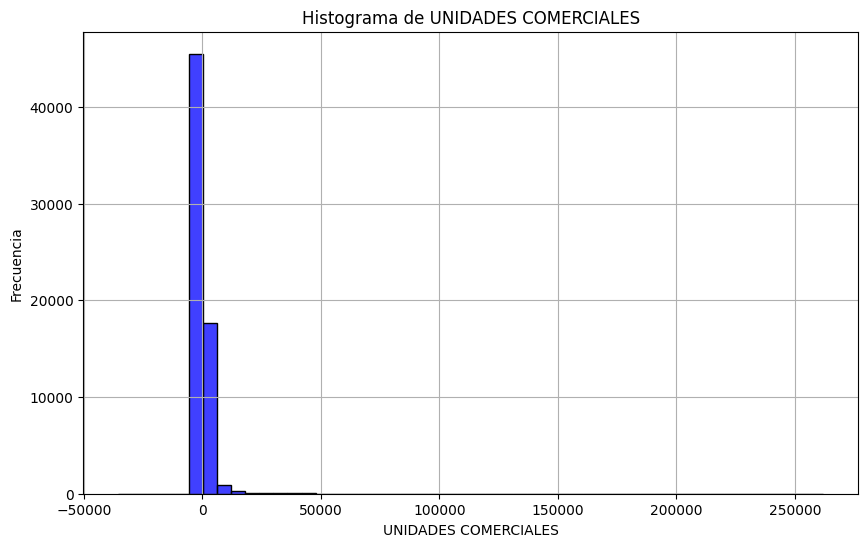

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UNIDADES COMERCIALES'], bins=50, kde=False, color='blue')
plt.title('Histograma de UNIDADES COMERCIALES')
plt.xlabel('UNIDADES COMERCIALES')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se observa una gran cantidad de valores cercanos a 0 y algunos valores con cantidades muy altas, lo que indica una distribución con asimetría positiva. Posiblemente se deba a la presencia de valores atípicos.

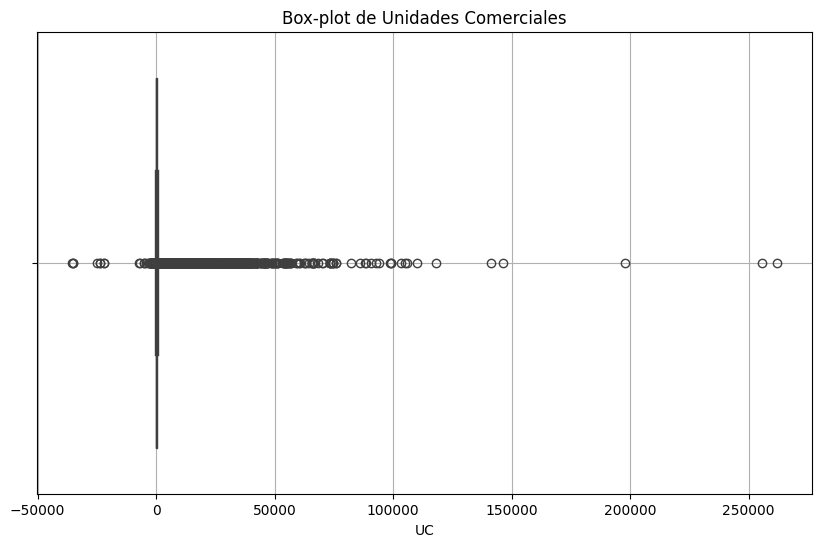

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UNIDADES COMERCIALES'])
plt.title('Box-plot de Unidades Comerciales')
plt.xlabel('UC')
plt.grid(True)
plt.show()

Se observa una gran cantidad de valores atípicos y también se puede observar que existen algunos valores negativos en la variable.

### **Análisis de valores atípicos**

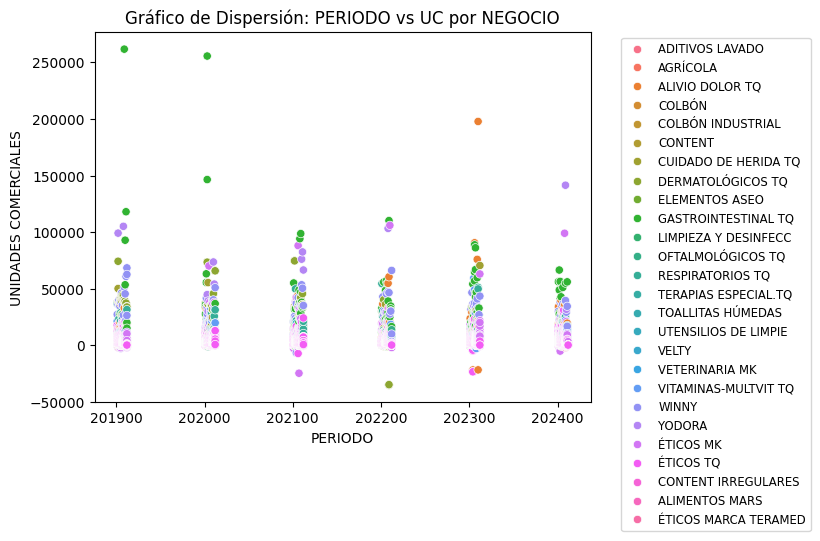

In [ ]:
# Crear un gráfico de dispersión con diferentes colores por negocio
sns.scatterplot(x='PERIODO', y='UNIDADES COMERCIALES', hue='NEGOCIO', data=df)
plt.title('Gráfico de Dispersión: PERIODO vs UC por NEGOCIO')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Por petición del cliente, se hace el análisis por negocio, ya que cada negocio tiene sus particularidades. Sin embargo, se observa que valores muy altos predmoninan en varios negocios y se procede mejor a ser un Boxplot para cada uno.

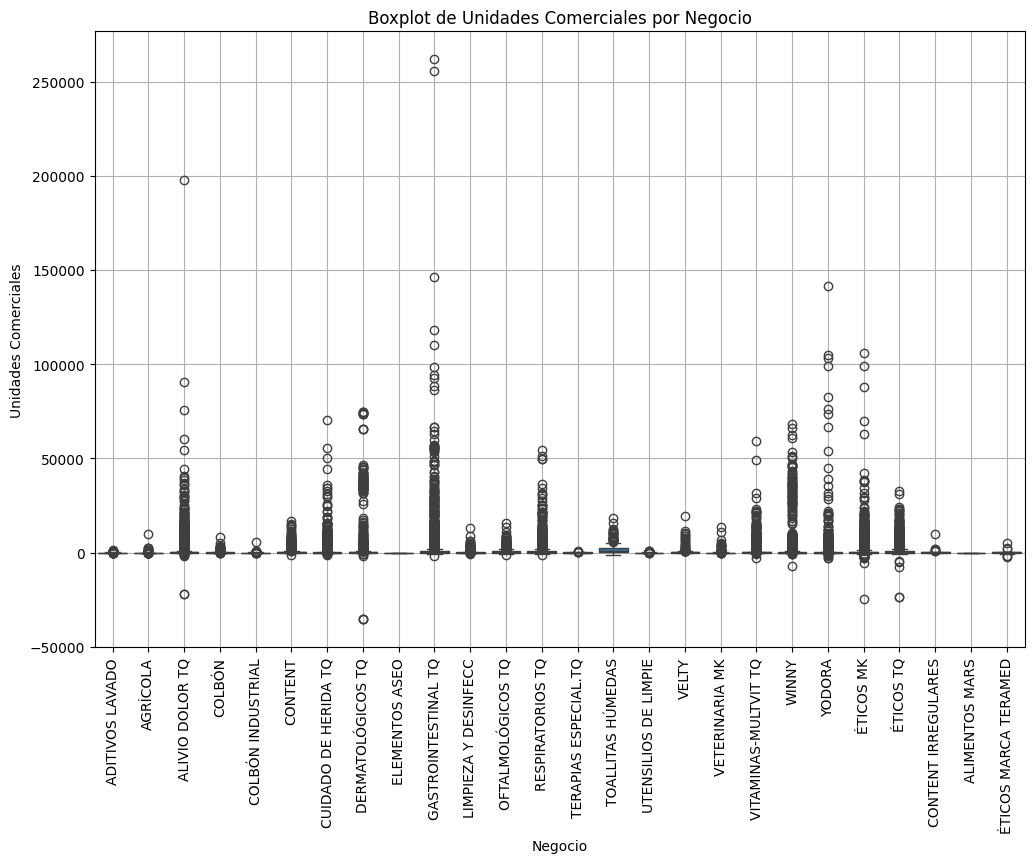

In [54]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='NEGOCIO', y='UNIDADES COMERCIALES', data=df)
plt.title('Boxplot de Unidades Comerciales por Negocio')
plt.xlabel('Negocio')
plt.ylabel('Unidades Comerciales')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

se observa que los negocios que rpesentan más normalidad son:

- Aditivos Lavado
- Agricola y Alimentos
- Colbon y Colbon Industrial
- Content 
- Grupo Clorox (Elementos Aseo, Limpieza y Desinfección)
- Eticos Teramed

Sin embargo, estos negocios son aquellos menos significativos (de menor venta) y por ende con menores cantidades de unidades despachadas.